In [27]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist

import sys
sys.path.append("../..")
from functools import partial

from analyzer.computations.dnnInputs import *
from analyzer.dumperReader.dnnSampleReader import feature_axises, featureNamesByType_withoutPrefix, FeatureType
from analyzer.driver.fileTools import *
from analyzer.driver.computations import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
dumperInput = DumperInputManager([
    #"/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v6/", "/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v12/"
        "/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/"                          
    ], 
            limitFileCount=None, restrictToAvailableDumperTypes=[DumperType.SuperclsSample]
            )

In [29]:
dumperInput.inputReaders

[SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/ticlDumper_28.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/ticlDumper_28.root, DumperType.SuperclsSample=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/superclsSample_28.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/ticlDumper_20.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/ticlDumper_20.root, DumperType.SuperclsSample=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/superclsSample_20.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/ticlDumper_29.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/ticlDumper_29.root, DumperType.SuperclsSample=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/rec

In [30]:
res = runComputations([seed_highestPt, pairs_highestPtSeed], dumperInput, max_workers=10)
highestPtSeed_df = res[0]
pairs_highestPtSeed_df = res[1]

  0%|          | 0/22 [00:00<?, ?it/s]

In [31]:
highestPtSeed_df

seedTracksterIdx  \
eventInternal endcapInternal                     
0             0                            579   
              1                           1879   
1             0                            595   
              1                           1928   
2             0                            692   
...                                        ...   
2197          1                           1862   
2198          0                            695   
              1                           2121   
2199          0                            756   
              1                           2345   

                              seedTracksterBestAssociationScore  \
eventInternal endcapInternal                                      
0             0                                        0.000593   
              1                                        0.000863   
1             0                                        0.000091   
              1                                        0.000073   
2             0                                        0.000970   
...                                                         ...   
2197          1                                        0.003225   
2198          0                                        0.000374   
              1                                        0.001612   
2199          0                                        0.001380   
              1                                        0.000672   

                              feature_multi_en  feature_seedEta  \
eventInternal endcapInternal                                      
0             0                       8.543876        -2.510458   
              1                       6.199521         2.511608   
1             0                       4.795211        -1.752980   
              1                       3.581733         1.752362   
2             0                      20.309771        -2.546691   
...                                        ...              ...   
2197          1                      10.210288         2.470703   
2198          0                       5.419787        -2.506445   
              1                       5.043588         2.506098   
2199          0                       7.774850        -2.330787   
              1                       2.020142         2.330784   

                              feature_seedPhi  feature_seedEn  feature_seedPt  \
eventInternal endcapInternal                                                    
0             0                     -1.131682      527.272827       93.761383   
              1                      2.014319      536.801270       95.275116   
1             0                      0.253168      161.126999       57.427555   
              1                     -2.863686      151.439789       55.633186   
2             0                     -0.470162      361.908234       62.187874   
...                                       ...             ...             ...   
2197          1                     -2.451904      393.026215       72.466896   
2198          0                      0.238764      535.591614       95.512817   
              1                     -2.895776      552.727478       98.837479   
2199          0                      2.069312      322.673218       67.993996   
              1                     -1.060204      326.319794       69.021339   

                              endcap  
eventInternal endcapInternal          
0             0                   -1  
              1                    1  
1             0                   -1  
              1                    1  
2             0                   -1  
...                              ...  
2197          1                    1  
2198          0                   -1  
              1                    1  
2199          0                   -1  
              1                    1  

[4400 rows x 8 columns]

In [32]:
pairs_highestPtSeed_df

seedTracksterIdx  candidateTracksterIdx  \
eventInternal pairInternal                                            
0             0                          579                    580   
              1                          579                    493   
              2                          579                    806   
              3                          579                    347   
              4                          579                   1105   
...                                      ...                    ...   
2199          184                       2345                   2087   
              185                       2345                   2458   
              186                       2345                   1668   
              187                       2345                   2222   
              188                       2345                   2272   

                            seedTracksterBestAssociationScore  \
eventInternal pairInternal                                      
0             0                                      0.000593   
              1                                      0.000593   
              2                                      0.000593   
              3                                      0.000593   
              4                                      0.000593   
...                                                       ...   
2199          184                                    0.000672   
              185                                    0.000672   
              186                                    0.000672   
              187                                    0.000672   
              188                                    0.000672   

                            candidateTracksterAssociationScoreWithSeed  \
eventInternal pairInternal                                               
0             0                                               0.811678   
              1                                               1.000000   
              2                                               1.000000   
              3                                               1.000000   
              4                                               1.000000   
...                                                                ...   
2199          184                                             1.000000   
              185                                             1.000000   
              186                                             1.000000   
              187                                             0.923388   
              188                                             1.000000   

                            feature_DeltaEtaBaryc  feature_DeltaPhiBaryc  \
eventInternal pairInternal                                                 
0             0                         -0.029995               0.244722   
              1                         -0.036918               0.475696   
              2                          0.043523               2.194176   
              3                         -0.012746               2.259129   
              4                         -0.084757               2.753382   
...                                           ...                    ...   
2199          184                       -0.040501               1.684340   
              185                        0.046212               2.212540   
              186                       -0.073133               0.819765   
              187                        0.064124              -0.140143   
              188                       -0.007353               0.797885   

                            feature_multi_en  feature_multi_eta  \
eventInternal pairInternal                                        
0             0                    13.846149          -2.480463   
              1                     9.926219          -2.473540   
              2                    16.

## Pair properties

In [33]:
feature_plotSetting = {"multi_pt" : {"xrange" : (0, 50.)},
                       "explVarRatio" : {"xrange" : (0.8, 1.)}}
feature_noYlog = ["DeltaEtaBaryc", "DeltaPhiBaryc", "explVarRatio"]

def fillHistFeaturePair(feat:str, genMatchingThreshold:float):
    h = hist.Hist(feature_axises[feat], hist.axis.IntCategory([0, 1], name="candidateGenMatching", label="1 : genMatched, 0: nonGenMatched", flow=False), name=feat)
    h.fill(**{feat : pairs_highestPtSeed_df["feature_"+feat], "candidateGenMatching" : pairs_highestPtSeed_df.candidateTracksterAssociationScoreWithSeed < genMatchingThreshold})
    return h

def plotHistFeaturePair(h:hist.Hist):
    feat = h.name
    plt.figure(figsize=(7, 7))
    settings = feature_plotSetting.get(feat, dict())
    h.stack("candidateGenMatching").plot(density=True, yerr=False, label=["Non gen matched", "Gen matched"], color=["tab:blue", "tab:red"], flow="none")
    try:
        plt.xlim(*settings["xrange"])
    except: pass
    if feat not in feature_noYlog:
        plt.yscale("log")
    plt.legend()
    plt.ylabel("Events (a.u.)")

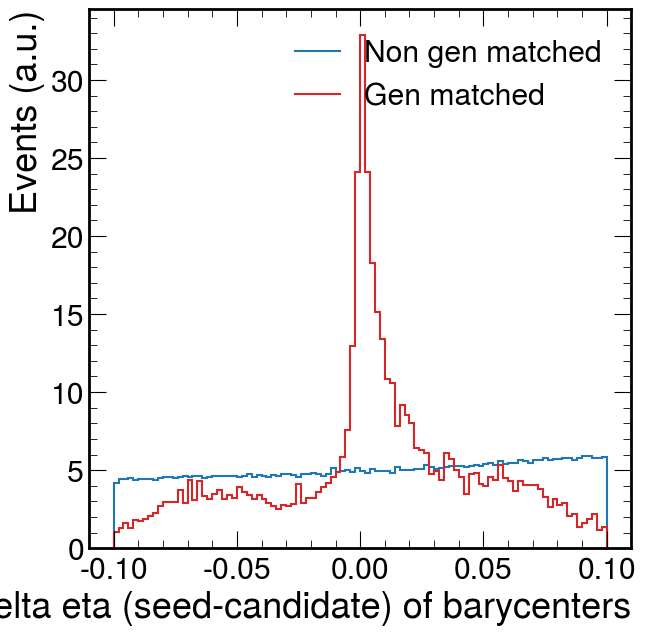

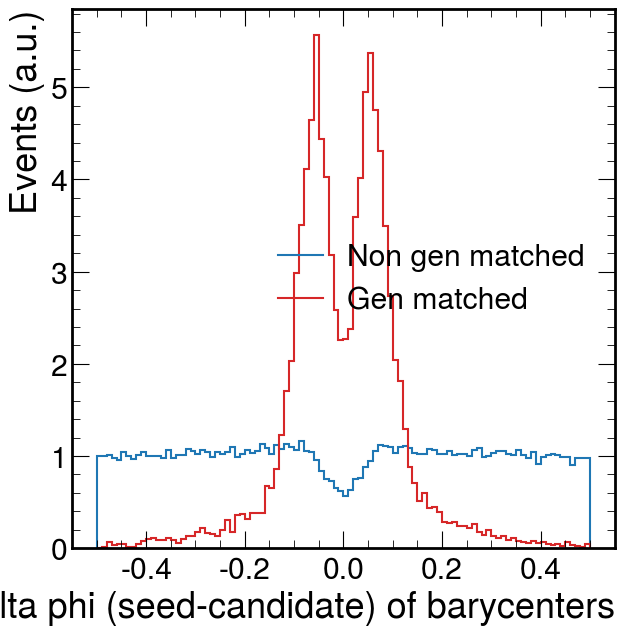

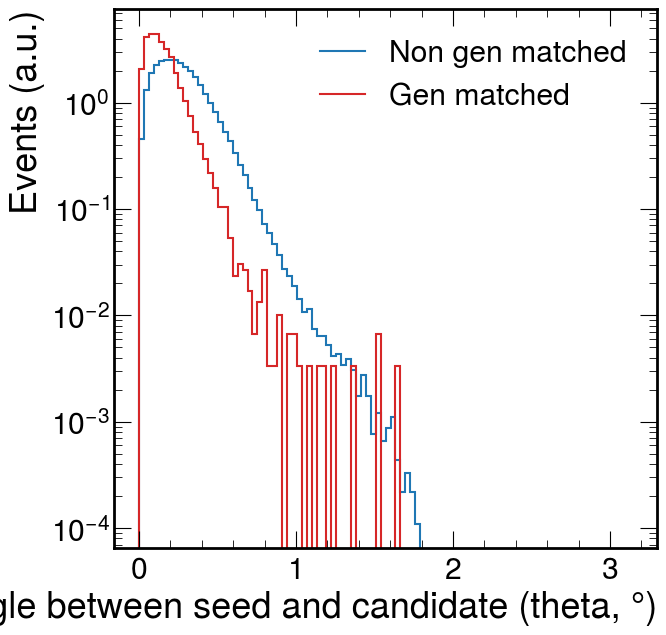

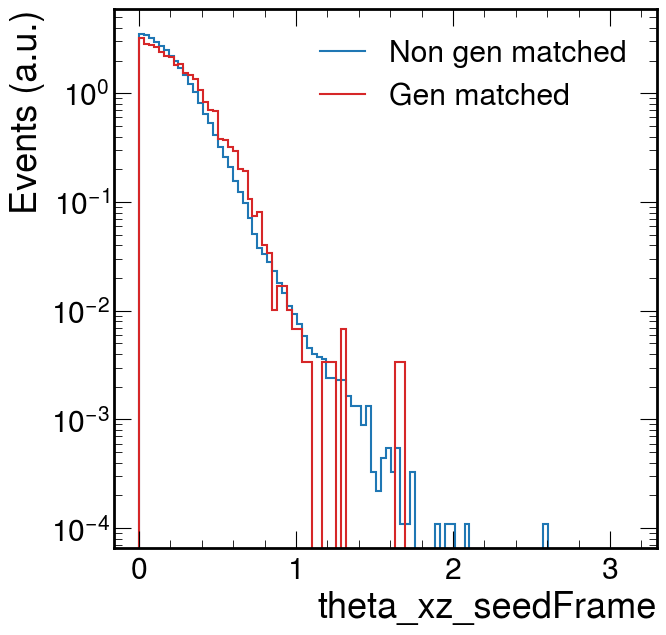

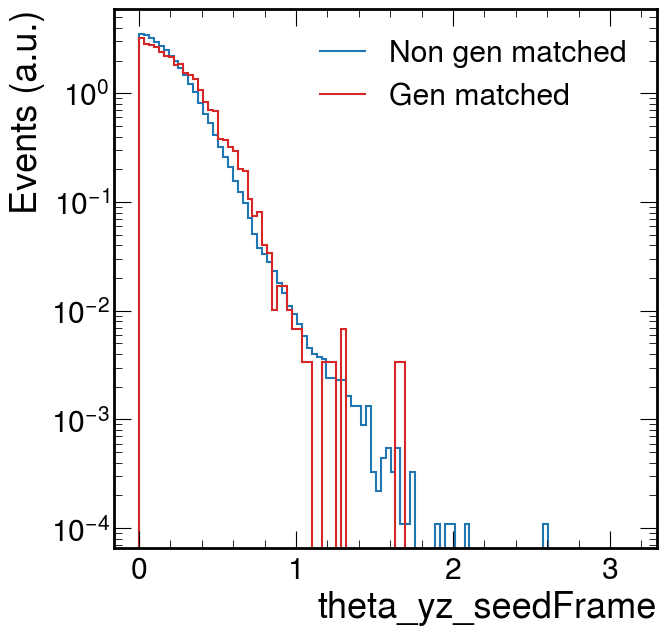

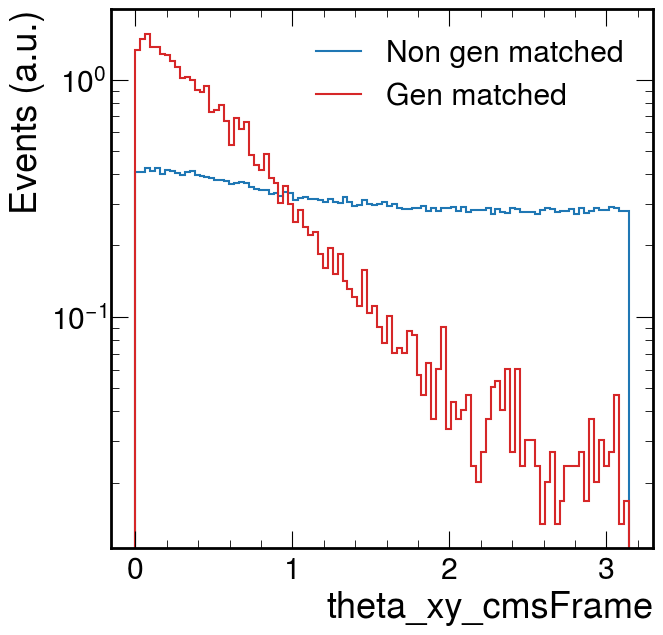

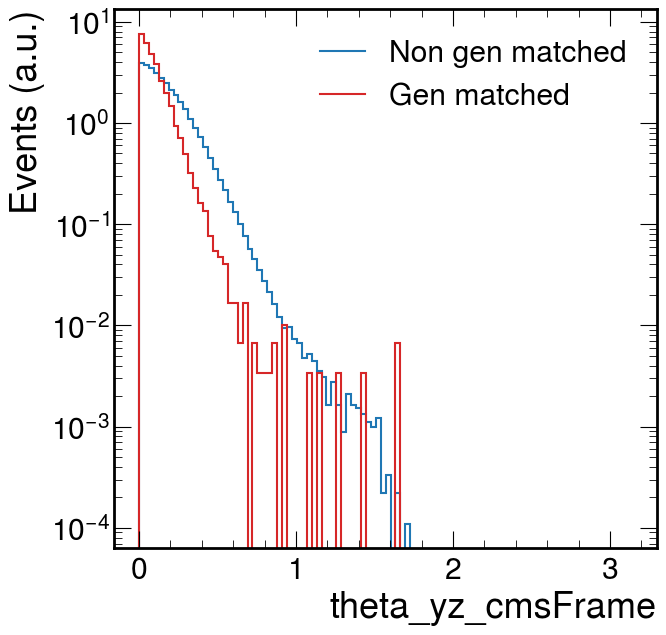

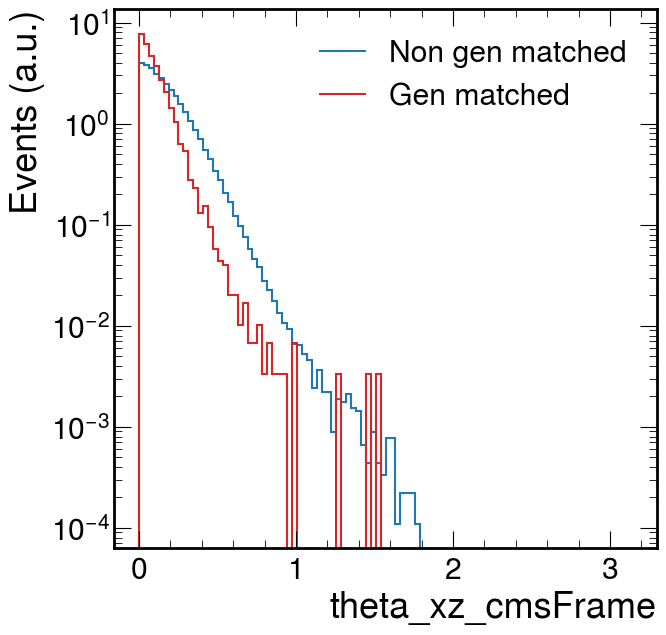

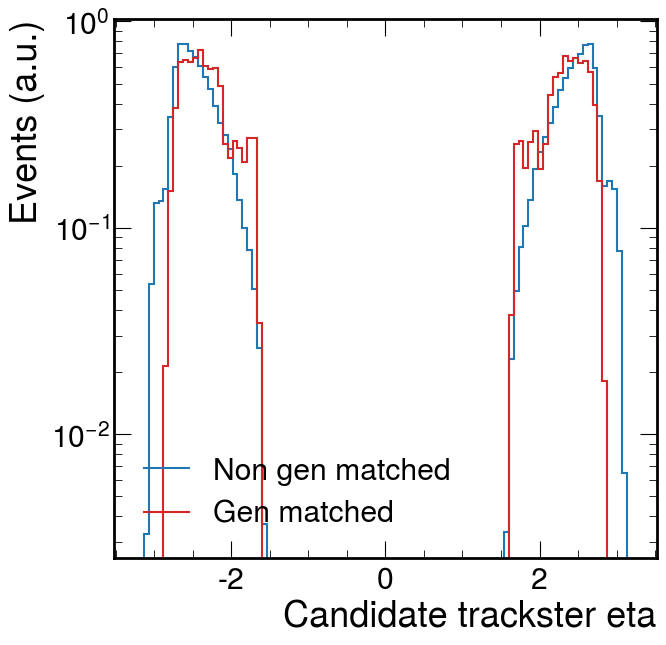

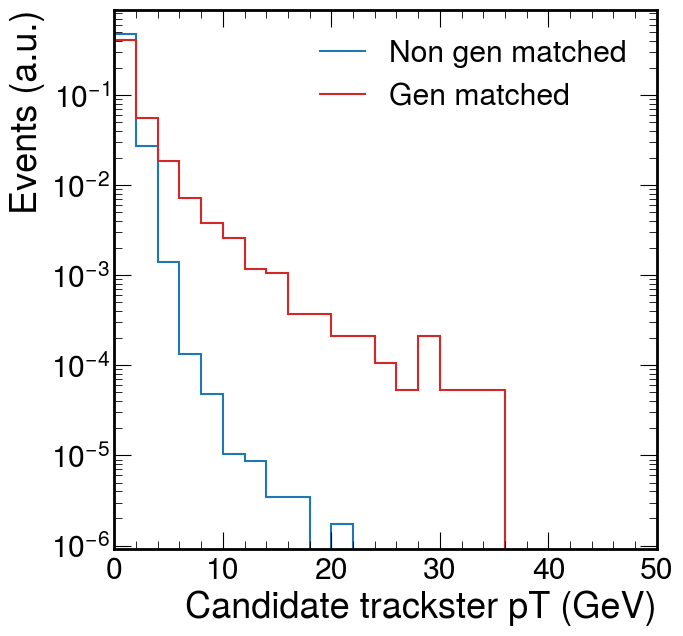

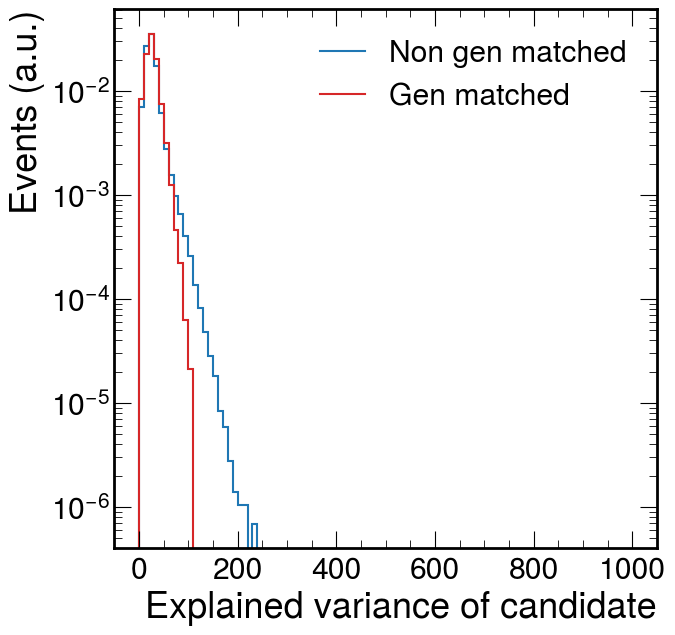

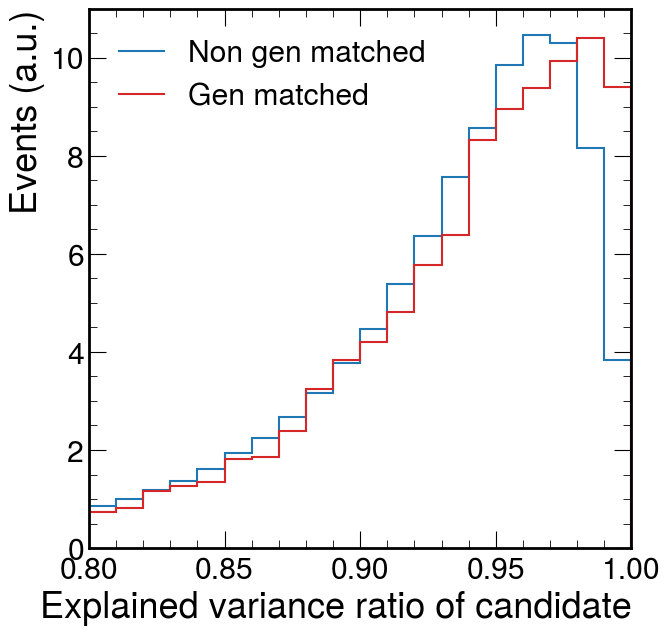

In [34]:
for feat in featureNamesByType_withoutPrefix[FeatureType.Pair]+featureNamesByType_withoutPrefix[FeatureType.Candidate]:
    plotHistFeaturePair(fillHistFeaturePair(feat, 0.5))